In [2]:
#필요한 모듈 선언
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#read_csv 를 통하여 dataframe 형태로 읽기
corona_all=pd.read_csv("./data/서울시 코로나19 확진자 현황.csv")

In [4]:
corona_all.head()   # 상위 5개의 데이터 출력


,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [16]:
#dataframe 정보를 요약하려 출력
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


In [7]:
corona_del_col = corona_all.drop(columns = ['국적','환자정보','조치사항'])

In [8]:
 corona_del_col.info() #정제 처리된 dataframe 정보를 출력합니다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5748 non-null   int64 
 1   확진일     5748 non-null   object
 2   환자번호    5748 non-null   int64 
 3   지역      5748 non-null   object
 4   여행력     459 non-null    object
 5   접촉력     5748 non-null   object
 6   상태      5357 non-null   object
 7   이동경로    5520 non-null   object
 8   등록일     5748 non-null   object
 9   수정일     5748 non-null   object
 10  노출여부    5748 non-null   object
dtypes: int64(2), object(9)
memory usage: 494.1+ KB


In [9]:
corona_del_col['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

In [10]:
#확진일 데이터를 month, day 데이터로 나누기
month = []
day = []
for data in corona_del_col['확진일']:
    #split 함수를 사용해서 월, 일 나누어 list 저장
    month.append(data.split('.')[0])
    day.append(data.split('.')[1])

In [11]:
corona_del_col['month'] = month
corona_del_col['day'] = day

corona_del_col['day'].astype('int64')
corona_del_col['month'].astype('int64')

0       10
1       10
2       10
3       10
4       10
        ..
5743     1
5744     1
5745     1
5746     1
5747     1
Name: month, Length: 5748, dtype: int64

In [12]:
# 그래프에서 x 축의 순서를 정리하기 위해서 order list를 생성합니다.
order = []
for i in range(1,11):
    order.append(str(i))
    
order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

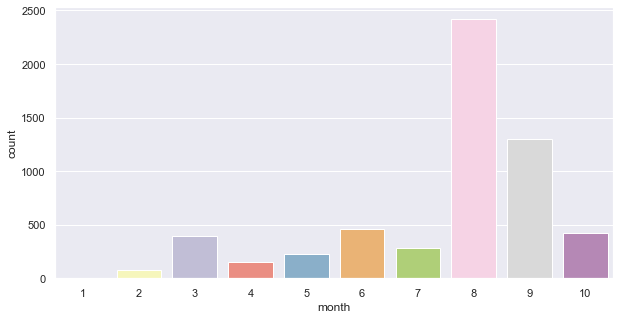

In [13]:
#그래프의 사이즈를 조절
plt.figure(figsize=(10,5))

#seaborn의 countplot 함수를 사용하여 출력
sns.set(style ="darkgrid")
ax=sns.countplot(x="month", data=corona_del_col, palette="Set3", order = order)


<AxesSubplot:>

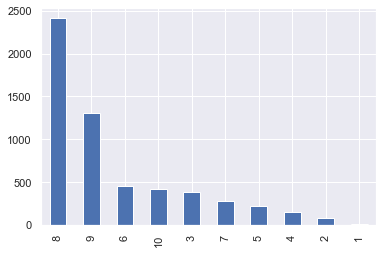

In [14]:
#series의 plot 함수를 사용한 출력 방법
corona_del_col['month'].value_counts().plot(kind='bar')

In [15]:
corona_del_col['month'].value_counts()


8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: month, dtype: int64

In [16]:
#8월 확진자 수 출력
# x축의 순서를 정리하기 위해서 order list를 생성
order2 = []
for i in range(1,32):
    order2.append(str(i))
order2

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31']

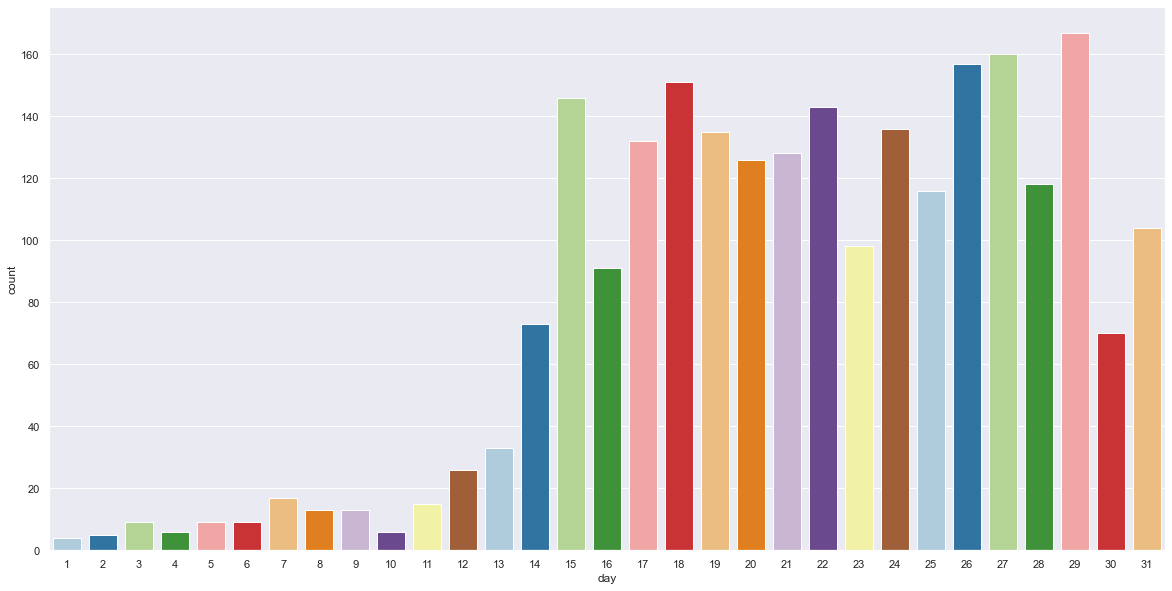

In [17]:
#seaborn의 countplot 함수를 사용하여 출력
plt.figure(figsize=(20,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="day", data = corona_del_col[corona_del_col['month'] == '8'],palette="Paired", order = order2)

In [18]:
#8월의 확진자 수
corona_del_col[corona_del_col['month'] == '8']['day'].count()/31

77.93548387096774

In [56]:
#지역별 확진자 수 출력
corona_del_col['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

In [36]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

In [41]:
# replace 함수를 사용하여 해당 데이터를 변경합니다.
# 이상치가 처리된 데이터이기에 새로운 Dataframe으로 저장합니다.
corona_out_region = corona_del_col.replace({'종랑구':'중랑구', '한국':'기타'})

In [42]:
#8월달 지역별 확진자수 출력 
#논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있습니다.
corona_out_region[corona_del_col['month'] == '8']

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
1271,4477,8.31.,20132,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,31
1272,4476,8.25.,17968,타시도,NaN,성북구 사랑제일교회 관련,NaN,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,25
1273,4475,8.26.,18821,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,26
1274,4474,8.27.,18818,타시도,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,27
1504,4244,8.30.,20116,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1608,8.2.,14382,용산구,일본,해외 접촉 추정,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,2
4141,1607,8.1.,14364,양천구,NaN,송파구 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4142,1606,8.1.,14362,종로구,NaN,종로구 지인모임 신명투자,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4144,1604,8.1.,14366,강서구,NaN,강서구 요양시설관련,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1


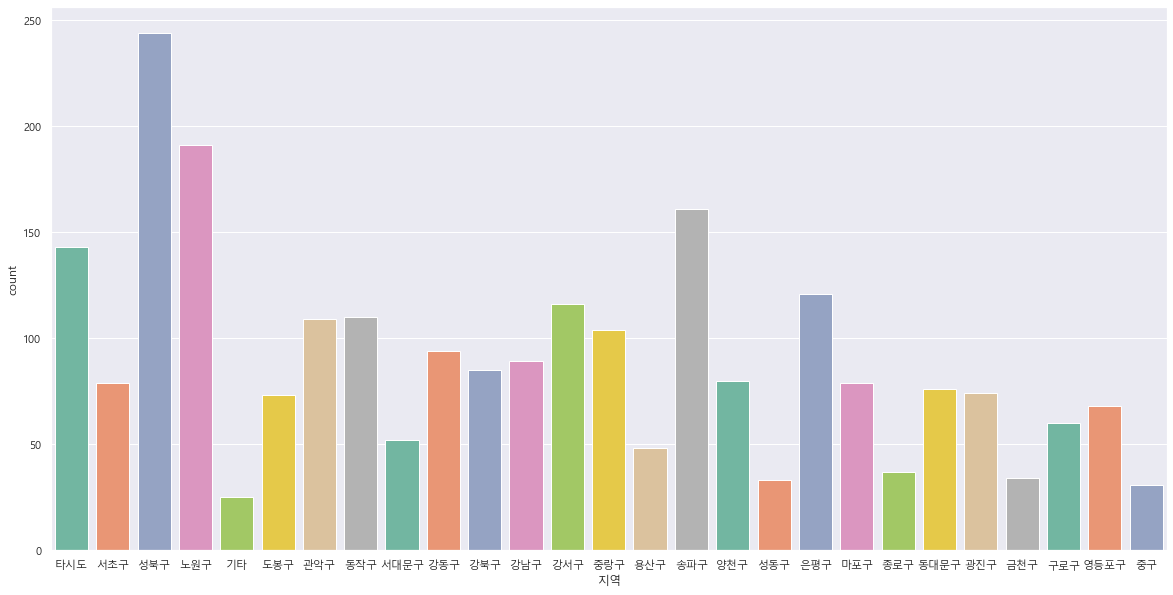

In [45]:
# 그래프를 출력합니다.
plt.figure(figsize=(20,10))
sns.set(font="Malgun gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
ax = sns.countplot(x="지역", data=corona_out_region[corona_del_col['month'] == '8'], palette="Set2")

서울 지역에서 확진자를 지도에 출력

In [57]:
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

# Map 함수를 사용하여 지도를 출력합니다.
#osm (open stream map)  , location [위도,경도], 초기 화면 크기 설정)
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

map_osm

In [59]:
# CRS에 저장합니다.
CRS=pd.read_csv("./data/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


In [60]:
CRS[CRS['시군구명_한글']=='중구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
11,12,11140,중구,Jung-gu,11,37.557945,126.99419


In [61]:
# corona_out_region의 지역에는 'oo구' 이외로 `타시도`, `기타`에 해당되는 데이터가 존재 합니다.
# 위 데이터에 해당되는 위도, 경도를 찾을 수 없기에 삭제하여 corona_seoul로 저장합니다.
corona_seoul = corona_out_region.drop(corona_out_region[corona_out_region['지역'] == '타시도'].index)
corona_seoul = corona_seoul.drop(corona_out_region[corona_out_region['지역'] == '기타'].index)

# 서울 중심지 중구를 가운데 좌표로 잡아 지도를 출력합니다.
map_osm = folium.Map(location=[37.557945, 126.99419], zoom_start=11)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아냅니다.
for region in set(corona_seoul['지역']):

    # 해당 지역의 데이터 개수를 count에 저장합니다.
    count = len(corona_seoul[corona_seoul['지역'] == region])
    # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
    CRS_region = CRS[CRS['시군구명_한글'] == region]

    # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다
    #folium 에서 marker 사용. 위도 컬럼, 경도 컬럼을 가져옴
    # 원형 마커의 크기 (범위 반경) count 값에 따라 달라지도록
    #팝업 -> region, count, 단위
    marker = folium.CircleMarker([CRS_region['위도'], CRS_region['경도']], # 위치
                                  radius=count/10 + 10,                 # 범위
                                  color='#3186cc',            # 선 색상
                                  fill_color='#3186cc',       # 면 색상
                                  popup=' '.join((region, str(count), '명'))) # 팝업 설정
    
    # 생성한 원형마커를 지도에 추가합니다.
    marker.add_to(map_osm)

map_osm